In [1]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
import os

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import emulator

In [2]:
cosmos_test = np.loadtxt("../CMASS/Gaussian_Process/hod_file/cosmology_camb_test_box_full.dat")

All params: ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w', 'M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']

In [5]:
omega_ms = cosmos_test[:,0]
sigma_8s = cosmos_test[:,2]

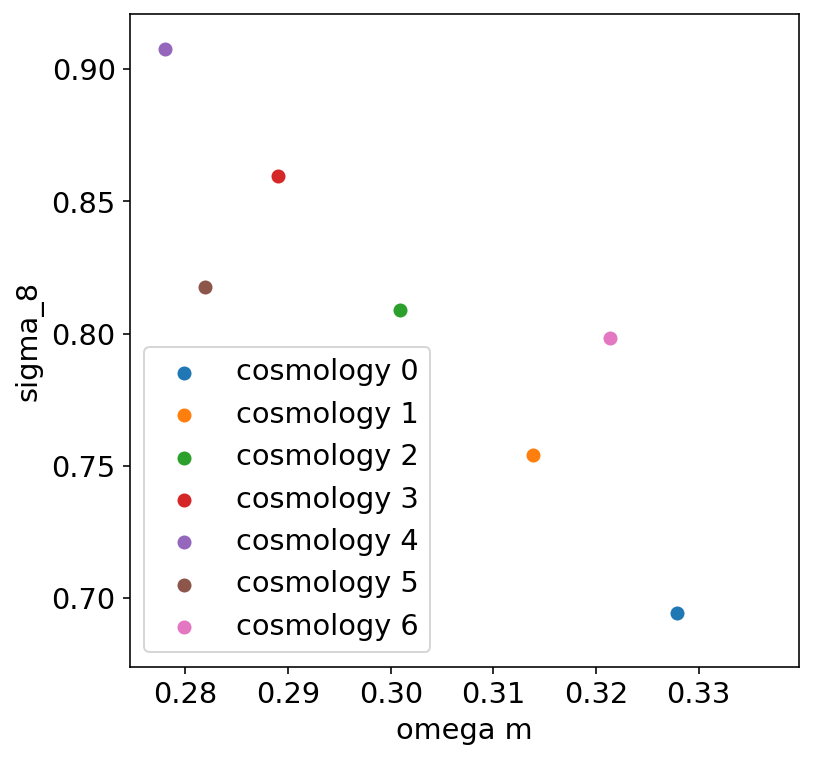

In [12]:
plt.figure(figsize=(6,6))
for i in range(len(omega_ms)):
    plt.scatter(omega_ms[i], sigma_8s[i], label=f"cosmology {i}")
plt.xlabel("omega m")
plt.ylabel("sigma_8")
plt.legend(loc='lower left')

extreme lower right: 0

central: 2

extreme upper left: 4

In [49]:
statistic = 'wp'
testtag = ''
res_dir = '../../clust/results_{}/'.format(statistic)
testing_dir = '{}testing_{}{}/'.format(res_dir, statistic, testtag)
testid = 0

In [50]:
CID_fid = 2
HID_fid = 3
boxid_fid = 0
idtag_fid = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID_fid, boxid_fid, HID_fid, testid)
rads, vals_fid = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag_fid),
                                                  delimiter=',', unpack=True)

In [57]:
dist_dict = {}
cosmos = range(7)
boxes = range(5)
hods = range(100)
for CID in cosmos:
    for boxid in boxes:
        for HID in hods:
            idtag = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(CID, boxid, HID, testid)
            rads, vals = np.loadtxt(testing_dir + "{}_{}.dat".format(statistic, idtag),
                                                              delimiter=',', unpack=True)

            dist = np.sqrt(np.sum(np.square(vals-vals_fid))) #distance between each statistic and fiducial
            dist_dict[idtag] = {'cosmo': CID, 'hod': HID, 'box': boxid, 'dist': dist, 'rads': rads, 'vals': vals}

In [63]:
dist_min_c0 = np.inf
dist_min_c4 = np.inf
idt_min_c0 = None
idt_min_c4 = None
for idt in dist_dict:
    dist = dist_dict[idt]['dist']
    cosmo = dist_dict[idt]['cosmo']
    if dist < dist_min_c0 and cosmo == 0:
        dist_min_c0 = dist
        idt_min_c0 = idt
    if dist < dist_min_c4 and cosmo == 4:
        dist_min_c4 = dist
        idt_min_c4 = idt
        
print(dist_dict[idt_min_c0])
print(dist_dict[idt_min_c4])

{'cosmo': 0, 'hod': 37, 'box': 0, 'dist': 55.77697692964884, 'rads': array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), 'vals': array([2489.934   , 1057.076   ,  449.3429  ,  216.6188  ,  132.7238  ,
         78.9272  ,   42.88505 ,   18.77324 ,    6.155025])}
{'cosmo': 4, 'hod': 36, 'box': 0, 'dist': 122.79221842029182, 'rads': array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), 'vals': array([2394.37    , 1001.539   ,  416.555   ,  187.4236  ,   97.73233 ,
         57.65827 ,   31.80737 ,   15.64829 ,    5.511599])}


In [53]:
idtag_min_c0 = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(dist_dict[idt_min_c0]['cosmo'], dist_dict[idt_min_c0]['box'],
                                                    dist_dict[idt_min_c0]['hod'], testid)
idtag_min_c4 = "cosmo_{}_Box_{}_HOD_{}_test_{}".format(dist_dict[idt_min_c4]['cosmo'], dist_dict[idt_min_c4]['box'],
                                                    dist_dict[idt_min_c4]['hod'], testid)

Text(0, 0.5, '$w_p$(r$_p$)')

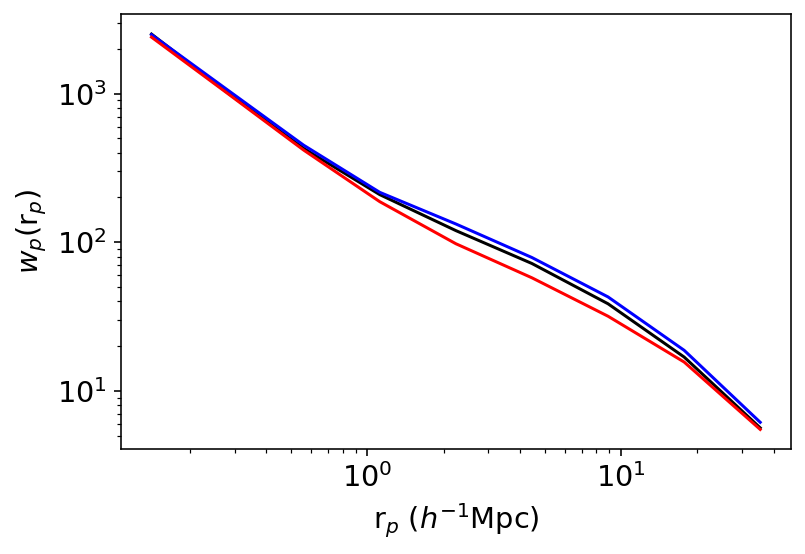

In [66]:
plt.plot(rads, vals_fid, color='k')
plt.plot(dist_dict[idt_min]['rads'], dist_dict[idt_min_c0]['vals'], color='b')
plt.plot(dist_dict[idt_min]['rads'], dist_dict[idt_min_c4]['vals'], color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"r$_p$ ($h^{-1}$Mpc)")
plt.ylabel(r"$w_p$(r$_p$)")

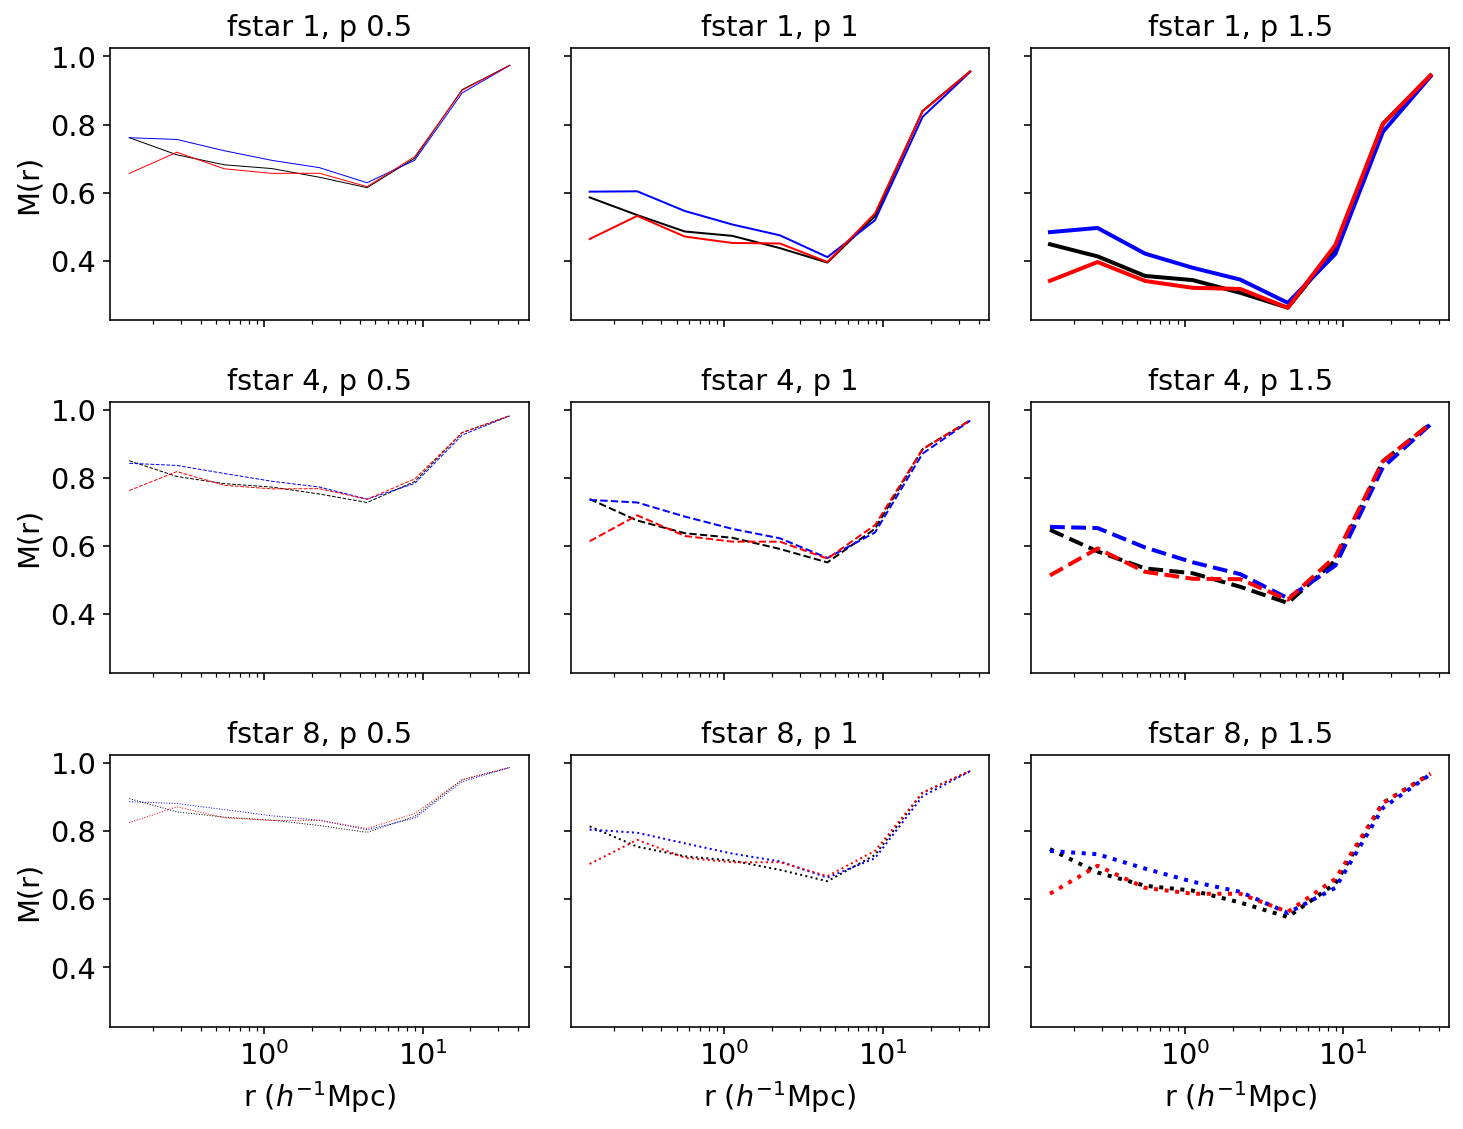

In [115]:
fstars = [1, 4, 8]
ps = [0.5, 1, 1.5]

lss = ['-', '--', ':']
lws = [0.5, 1, 2]

fig, axarr = plt.subplots(nrows=len(fstars), ncols=len(ps), figsize=(12,9), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.1)
for i, fstar in enumerate(fstars):
    for j, p in enumerate(ps):
        ax = axarr[i,j]
        testtag = f'_investigate_fstar{fstar}_p{p}'
        res_dir = '../../clust/results_{}/'.format('mcf')
        testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
        rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c0 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c0),
                                                          delimiter=',', unpack=True)
        rads, mcf_min_c4 = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_min_c4),
                                                          delimiter=',', unpack=True)
        
        #plt.figure()
        ax.set_title(f"fstar {fstar}, p {p}")
        ax.plot(rads, mcf_fid, color='k', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c0, color='b', ls=lss[i], lw=lws[j])
        ax.plot(rads, mcf_min_c4, color='r', ls=lss[i], lw=lws[j])
        ax.set_xscale('log')
        
        if i==len(fstars)-1:
            ax.set_xlabel(r"r ($h^{-1}$Mpc)")
        if j==0:
            ax.set_ylabel(r"M(r)")

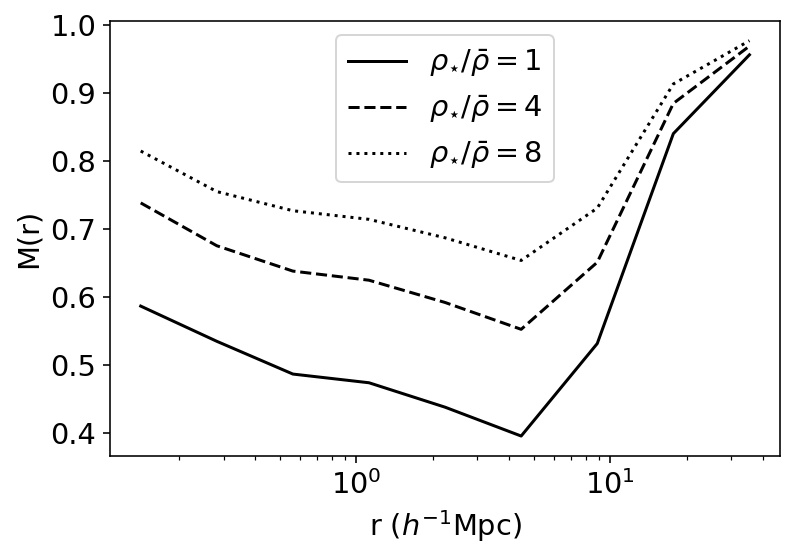

In [116]:
p = 1
for i, fstar in enumerate(fstars):
    testtag = f'_investigate_fstar{fstar}_p{p}'
    res_dir = '../../clust/results_{}/'.format('mcf')
    testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
    rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                      delimiter=',', unpack=True)

    plt.plot(rads, mcf_fid, color='k', ls=lss[i], label=r'$\rho_{\star}/\bar{\rho} = $'+str(fstar))

plt.xscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"M(r)")
plt.legend()    

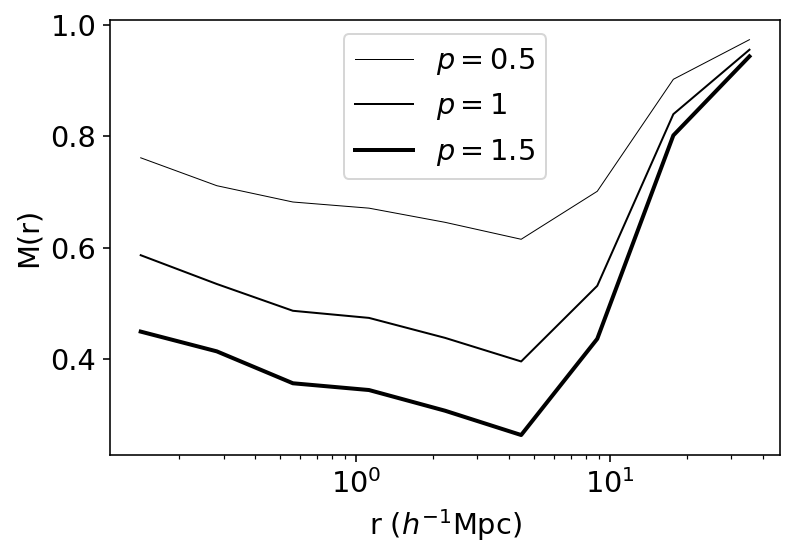

In [117]:
fstar = 1
for i, p in enumerate(ps):
    testtag = f'_investigate_fstar{fstar}_p{p}'
    res_dir = '../../clust/results_{}/'.format('mcf')
    testing_dir = '{}testing_{}{}/'.format(res_dir, 'mcf', testtag)
    rads, mcf_fid = np.loadtxt(testing_dir + "{}_{}.dat".format('mcf', idtag_fid),
                                                      delimiter=',', unpack=True)

    plt.plot(rads, mcf_fid, color='k', lw=lws[i], label=r'$p = $'+str(p))

plt.xscale('log')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"M(r)")
plt.legend()    